In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [4]:
df = pd.read_csv("kc_house_data.csv")
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [5]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [8]:
df = df.dropna()
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [49]:
X = df.drop(['price', 'date', 'floors'], axis=1)
X.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,3,1.00,1180,5650,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,3,2.25,2570,7242,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2,1.00,770,10000,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,4,3.00,1960,5000,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,3,2.00,1680,8080,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [50]:
y = df['price']
y.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

In [51]:
y.value_counts().sort_index()

price
75000.0      1
78000.0      1
80000.0      1
81000.0      1
82000.0      1
            ..
5350000.0    1
5570000.0    1
6885000.0    1
7062500.0    1
7700000.0    1
Name: count, Length: 4028, dtype: int64

In [52]:
y.value_counts()

price
350000.0     172
450000.0     172
550000.0     159
500000.0     152
425000.0     150
            ... 
607010.0       1
1362500.0      1
298800.0       1
957500.0       1
402101.0       1
Name: count, Length: 4028, dtype: int64

In [53]:
Y = pd.get_dummies(y).values

In [54]:
X = X.values

In [55]:
X

array([[ 7.12930052e+09,  3.00000000e+00,  1.00000000e+00, ...,
        -1.22257000e+02,  1.34000000e+03,  5.65000000e+03],
       [ 6.41410019e+09,  3.00000000e+00,  2.25000000e+00, ...,
        -1.22319000e+02,  1.69000000e+03,  7.63900000e+03],
       [ 5.63150040e+09,  2.00000000e+00,  1.00000000e+00, ...,
        -1.22233000e+02,  2.72000000e+03,  8.06200000e+03],
       ...,
       [ 1.52330014e+09,  2.00000000e+00,  7.50000000e-01, ...,
        -1.22299000e+02,  1.02000000e+03,  2.00700000e+03],
       [ 2.91310100e+08,  3.00000000e+00,  2.50000000e+00, ...,
        -1.22069000e+02,  1.41000000e+03,  1.28700000e+03],
       [ 1.52330016e+09,  2.00000000e+00,  7.50000000e-01, ...,
        -1.22299000e+02,  1.02000000e+03,  1.35700000e+03]])

In [56]:
Y

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [57]:
y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

In [66]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [67]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((17290, 18), (4323, 18), (17290, 4028), (4323, 4028))

In [68]:
#Defining the model

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(10, input_shape=(18,),activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(40, activation='relu'))
# model.add(Dense(80, activation='relu'))
# model.add(Dense(40, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(4028))

model.compile(optimizer = 'rmsprop', loss = 'mse', metrics=['mse'])

model.summary()

/opt/anaconda3/envs/DLvirt/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_40 (Dense)                │ (None, 10)             │           190 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 20)             │           220 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 40)             │           840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 20)             │           820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 4028)           │        44,308 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 46,588 (181.98 KB)

 Trainable params: 46,588 (181.98 KB)

 Non-trainable params: 0 (0.00 B)

In [69]:
N_EPOCHS = 30

history=model.fit(x=X_train, y=y_train, epochs=N_EPOCHS, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

Epoch 1/30


2025-04-29 10:44:15.560767: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


541/541 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 9858812215296.0000 - mse: 9858812215296.0000 - val_loss: 1.4889 - val_mse: 1.4889
Epoch 2/30
541/541 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 1.0979 - mse: 1.0979 - val_loss: 3.3954e-04 - val_mse: 3.3954e-04
Epoch 3/30
541/541 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 3.1149e-04 - mse: 3.1149e-04 - val_loss: 2.6457e-04 - val_mse: 2.6457e-04
Epoch 4/30
541/541 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 2.5940e-04 - mse: 2.5940e-04 - val_loss: 2.5085e-04 - val_mse: 2.5085e-04
Epoch 5/30
541/541 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 2.4987e-04 - mse: 2.4987e-04 - val_loss: 2.4833e-04 - val_mse: 2.4833e-04
Epoch 6/30
541/541 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 2.4814e-04 - mse: 2.4814e-04 - val_loss: 2.4787e-04 - val_mse: 2.4787e-04
Epoch 7/30
541/541 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 2.4781e-04 - mse: 2.4781e-04 - val_loss: 2.4778e-04 - val_mse: 2.4778e-04
Epoch 8/30
541/541 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 2.4775e-04 - 

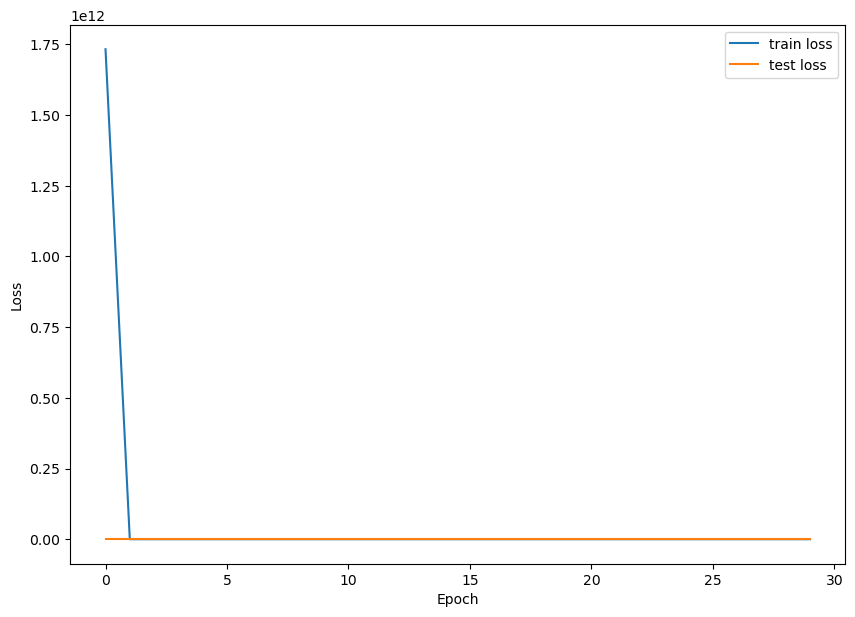

In [70]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()